In [ ]:
%matplotlib inline

!pip install graphviz
!pip install mglearn

import pandas as pd
pd.set_option('display.max_columns', 160)
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import pandas_profiling

#visual
import mglearn
import graphviz

     |████████████████████████████████| 542kB 45.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#verification code
#4/TAFhVHPCntmq_IUCLleI-mYpJnibe8_6IFWpXU8sdMbuCiakZ79KlXw

     |████████████████████████████████| 993kB 47.4MB/s 


In [ ]:
# Just load the file to the Colab
link = 'https://drive.google.com/open?id=1FUI-qNmmXXpUpPTN8cUzM2NK-QYFm65e' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('lending_club.zip') 

1FUI-qNmmXXpUpPTN8cUzM2NK-QYFm65e


In [ ]:
# Read the data from the environment

import zipfile

#get the data from the zipped csv file
with zipfile.ZipFile("lending_club.zip") as z:
   with z.open("accepted_2007_to_2018Q3.csv") as f:
      loan1 = pd.read_csv(f)
      #print(loan.head())    # print the first 5 rows

In [ ]:
loan = loan1.copy()

In [ ]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,93999587,NaN,19200.0,19200.0,19200.0,36 months,13.99,656.12,C,C3,Foreman,10+ years,MORTGAGE,75000.0,Not Verified,Dec-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,531xx,WI,16.98,0.0,Dec-2003,740.0,744.0,0.0,NaN,NaN,8.0,0.0,12802.0,59.8,12.0,w,7057.74,7057.74,15909.570000,15909.57,12142.26,3767.31,0.0,0.00,0.0000,Jan-2019,656.12,Feb-2019,Jan-2019,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,243746.0,0.0,2.0,0.0,2.0,15.0,6341.0,39.0,0.0,0.0,4126.0,57.0,21400.0,0.0,0.0,0.0,3.0,30468.0,7136.0,53.4,0.0,0.0,111.0,80.0,26.0,15.0,3.0,47.0,NaN,15.0,NaN,0.0,2.0,3.0,2.0,2.0,3.0,3.0,4.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,277588.0,24788.0,15300.0,16273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,96219354,NaN,7000.0,7000.0,7000.0,36 months,5.32,210.81,A,A1,Nurse,2 years,RENT,85000.0,Not Verified,Dec-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,112xx,NY,12.80,1.0,Feb-1992,705.0,709.0,0.0,20.0,30.0,14.0,1.0,6565.0,19.7,17.0,w,2458.06,2458.06,5054.270000,5054.27,4541.94,512.33,0.0,0.00,0.0000,Jan-2019,210.81,Feb-2019,Jan-2019,709.0,705.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42606.0,0.0,2.0,0.0,0.0,30.0,36041.0,90.0,2.0,4.0,1157.0,58.0,33300.0,0.0,0.0,0.0,4.0,3043.0,15577.0,16.7,0.0,0.0,70.0,298.0,9.0,9.0,0.0,9.0,20.0,18.0,20.0,0.0,4.0,7.0,6.0,7.0,2.0,12.0,15.0,7.0,14.0,0.0,0.0,0.0,2.0,88.2,0.0,0.0,0.0,73420.0,42606.0,18700.0,40

In [ ]:
#pandas_profiling.ProfileReport(loan)

In [ ]:
from sklearn.base import clone
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

import graphviz

from sklearn.externals import joblib


In [ ]:
#============================= PREPARING COMPLETE DATA ==================


# Drop NA columns
loan.dropna(axis=1, thresh=len(loan)*0.75, inplace=True)
#print(loan.info())

# Drop constant columns
loan = loan.loc[:, (loan != loan.iloc[0]).any()] 
#loan.info()

#loan.head()

# check for suspicious features on the small subset and after that drop them from the main dataset
#loan_10k = loan[:100000]
#pandas_profiling.ProfileReport(loan)

# Select columns which don't contain very useful information and drop it
cols_to_drop = ["acc_now_delinq","chargeoff_within_12_mths","collection_recovery_fee",
"collections_12_mths_ex_med","delinq_2yrs","delinq_amnt","emp_title","fico_range_high",
"funded_amnt_inv","inq_last_6mths","installment","issue_d","num_accts_ever_120_pd",
"num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","out_prncp_inv",
"pub_rec_bankruptcies","recoveries","tax_liens","tot_coll_amt","tot_hi_cred_lim","total_pymnt_inv",
"total_rec_late_fee","total_rec_prncp","id","sub_grade","emp_title","pymnt_plan","url","purpose",
"title","zip_code","initial_list_status","policy_code","application_type","last_pymnt_d", 
                "last_credit_pull_d", "earliest_cr_line"]
loan.drop(cols_to_drop, axis=1, inplace=True)
#loan.head()


#Check for na's
#print(loan.isna().sum())
#print(loan.isnull().any(axis=1).sum())


# Let's filter loan status by values - exclude 'Current' as we don't know exactly if 
# client become defaulted or not
# and then sort loans by the loan status
# DEFAULTED - 1, NOT DEFAULTED - 0
loan = loan[loan['loan_status'] != 'Current']

loan['loan_status'] = loan['loan_status'].str.replace("Fully Paid", "0")
loan['loan_status'] = loan['loan_status'].str.replace("Charged Off", "1")
loan['loan_status'] = loan['loan_status'].str.replace("Late \(31-120 days\)", "1")
loan['loan_status'] = loan['loan_status'].str.replace("In Grace Period", "1")
loan['loan_status'] = loan['loan_status'].str.replace("Late \(16-30 days\)", "1")
loan['loan_status'] = loan['loan_status'].str.replace("Default", "1")

loan.sort_values(by='loan_status')

#transform emp_length
loan["emp_length"] = loan["emp_length"].str.replace('years','')
loan["emp_length"] = loan["emp_length"].str.replace('year','')
loan["emp_length"] = loan["emp_length"].str.replace('+','')
loan["emp_length"] = loan["emp_length"].str.replace('<','')
loan["emp_length"] = loan["emp_length"].str.replace('>','')
loan["emp_length"] = loan["emp_length"].str.replace(' ','')

loan["emp_length"].unique()  #great
#print(loan.info())
#print(loan.head())

# drop all na's by the row so there are no missing values
loan = loan.dropna()

# final length of the dataset
print(len(loan))
loan['loan_status'].head()

1018311


7     1
9     0
12    1
16    0
17    0
Name: loan_status, dtype: object

In [ ]:
#Check for disbalance
print(len(loan[loan['loan_status']=="0"]))
len(loan[loan['loan_status']=="1"])

783261


235050

In [ ]:
loan.head()

In [ ]:
# Now, let's separate float (numeric) and object (char) columns
 
target = pd.to_numeric(loan["loan_status"]) #convert target to numeric because now it has a string type
addr_state = loan["addr_state"] #!!! important for clustering, maybe...


loan_numeric = loan.select_dtypes(include=['float64'])
#print(loan_numeric.info())
loan_char = loan.select_dtypes(include=['object']).drop(["loan_status", "addr_state"], axis=1) #without addr_state
loan_char_dummies = pd.get_dummies(loan_char)

# it's feature names list, it will be useful for representation 
feature_names = list(loan_numeric) + list(loan_char_dummies)
feature_names[:5]
loan_numeric[:2]
#print(loan_char.info())

#print(loan_numeric.head())
#print(loan_numeric.tail())

#print(loan_char.head())
#print(loan_char.head())

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
7,25900.0,25900.0,25.49,54000.0,20.00,685.0,9.0,0.0,27346.0,64.5,26.0,0.0,14566.730000,7627.95,767.66,609.0,605.0,166140.0,42400.0,5.0,18460.0,4154.0,86.8,158.0,382.0,14.0,14.0,3.0,15.0,2.0,3.0,3.0,4.0,7.0,10.0,7.0,13.0,0.0,96.2,50.0,31985.0,31500.0,7665.0
9,8000.0,8000.0,7.99,57000.0,28.45,680.0,7.0,0.0,5938.0,36.7,34.0,0.0,8342.110922,342.11,6847.03,684.0,680.0,146207.0,16200.0,2.0,20887.0,20.0,99.2,242.0,227.0,9.0,9.0,3.0,9.0,9.0,1.0,3.0,1.0,10.0,16.0,3.0,15.0,1.0,76.5,100.0,71902.0,2500.0,88422.0


In [ ]:
len(feature_names)

In [ ]:
# And now prepare the data to the comfort format 

# There are two datasets: both have dummies from char dataset, 
# but first has original numeric values and second has scaled numeric values
# this is because some algorithms don't require scaled data so after training and 
# making predictions we can explain results on the comprehensive data

# Original
#loan_char_transformed = loan_char_dummies.values
loan_prepared_original = pd.concat((loan_numeric,loan_char_dummies), axis=1)

# Scaled
scaler = StandardScaler()
loan_numeric_scaled = scaler.fit_transform(loan_numeric)
loan_prepared_scaled = np.concatenate((loan_numeric_scaled,loan_char_dummies), axis=1)

print('Shape of loan_prepared_original: {}'.format(loan_prepared_original.shape))
print('Shape of loan_prepared_scaled: {}'.format(loan_prepared_scaled.shape))


Shape of loan_prepared_original: (1018311, 77)
Shape of loan_prepared_scaled: (1018311, 77)


In [ ]:
X = loan_prepared_scaled[:10000]
y = target[:10000]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)
logreg = LogisticRegression()
knn = KNeighborsClassifier()  #very slow
tree = DecisionTreeClassifier()
sgd_clf = SGDClassifier()
lin_svc = LinearSVC()
svc = SVC() #slow
rforest = RandomForestClassifier()
gbrt_clf = GradientBoostingClassifier() #slow

#THIS IS A FUNCTION
def fit_and_metrics(clf):
  clf.fit(X_train, y_train)
  y_pred = cross_val_predict(clf, X_train, y_train, cv=3)
  
  print("Classifier: {}\n Training set accuracy: {}\n Test set accuracy: {}\ ".format(clf.__class__.__name__, 
                                                                                     clf.score(X_train, y_train),
                                                                                     clf.score(X_test, y_test)))
  print("Confusion matrix: {}".format(confusion_matrix(y_train, y_pred)))
  print("Precision: {} \n Recall: {}\n F1-score: {} \n".format(precision_score(y_train, y_pred, average="binary", pos_label=1),
                                                           recall_score(y_train, y_pred, average="binary", pos_label=1),
                                                           f1_score(y_train, y_pred, average="binary", pos_label=1)))

(10000, 77)
(10000,)


In [ ]:
fit_and_metrics(logreg)
fit_and_metrics(knn)
fit_and_metrics(tree)
fit_and_metrics(sgd_clf)
fit_and_metrics(lin_svc)
fit_and_metrics(rforest)



In [ ]:
#-------------A small test--------------------
# Since we have lots of data the models are trained very very well
# And visualization is similar to the results of the ideal model
# To avoid this we should reduce size of the data to 1000 samples
#X = loan_prepared_scaled[:1000]
#y = target[:1000]

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

"""logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = cross_val_predict(logreg, X_train, y_train, cv=3)
  
print("Classifier: {}\n Training set accuracy: {}\n Test set accuracy: {}\ ".format(logreg.__class__.__name__, 
                                                                                     logreg.score(X_train, y_train),
                                                                                     logreg.score(X_test, y_test)))
print("Confusion matrix: {}".format(confusion_matrix(y_train, y_pred)))
print("Precision: {} \n Recall: {}\n F1-score: {} \n".format(precision_score(y_train, y_pred, average="binary"),
                                                           recall_score(y_train, y_pred, average="binary"),
                                                           f1_score(y_train, y_pred, average="binary")))
"""
#THIS IS WILL BE AN OUTER FUNCTION
#method important!!!
from sklearn.metrics import precision_recall_curve
#_scores = cross_val_predict(logreg, X_train, y_train, cv=3, method="decision_function") #distance from the point to the separating hyperplane
#recisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

#THIS IS INNER FUNCTION 
#method important!!!
def plot_precision_recall_vs_threshold(clf): #only for decision function
  #from sklearn.metrics import precision_recall_curve
  y_scores = cross_val_predict(clf, X_train, y_train, cv=3, method="decision_function") #distance from the point to the separating hyperplane
  precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.title(clf.__class__.__name__)
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])
  plt.show()


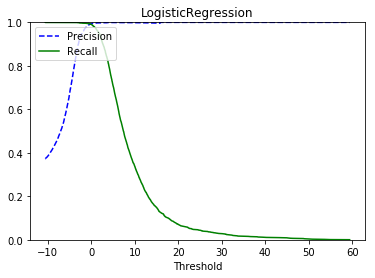

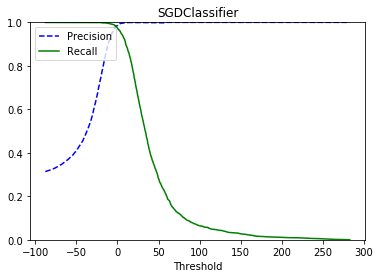

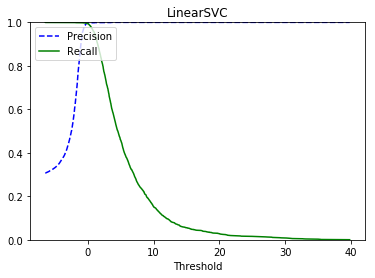

In [ ]:
plot_precision_recall_vs_threshold(logreg)
#plot_precision_recall_vs_threshold(knn)
#plot_precision_recall_vs_threshold(tree)
plot_precision_recall_vs_threshold(sgd_clf)
plot_precision_recall_vs_threshold(lin_svc)
#plot_precision_recall_vs_threshold(rforest)



In [ ]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))

0.9972675003320746


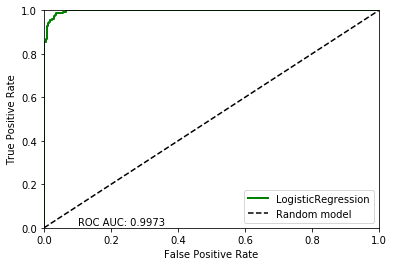

0.9907019108521984


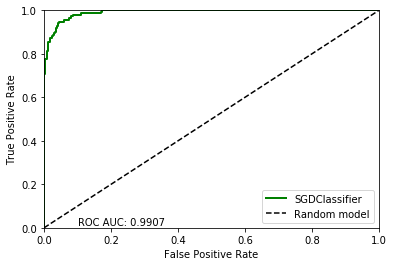

0.9969638892578607


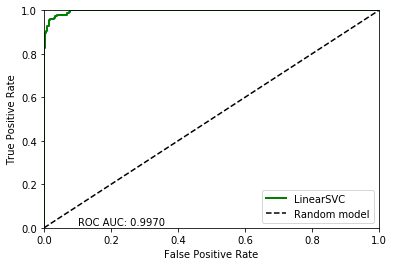

In [ ]:
#ROC curve

#THIS IS A FUNCTION 
def plot_roc_curve(clf):
  #from sklearn.metrics import roc_curve
  y_scores = cross_val_predict(clf, X_train[:500], y_train[:500], cv=2, method="decision_function")
  fpr, tpr, thresholds = roc_curve(y_train[:500], y_scores, pos_label=1)
  plt.plot(fpr, tpr, 'g-',linewidth=2, label=clf.__class__.__name__)
  plt.plot([0, 1], [0, 1], 'k--', label="Random model")
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.text(x=0.1,y=0.01,s="ROC AUC: {0:0.4f}".format(roc_auc_score(y_train[:500], y_scores)))
  #ROC-AUC after the plot
  print(roc_auc_score(y_train[:500], y_scores))
  plt.legend(loc=4)
  plt.show()

#ROC curve for several classifiers
"""
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()
"""


plot_roc_curve(logreg)
#plot_precision_recall_vs_threshold(knn)
#plot_precision_recall_vs_threshold(tree)
plot_roc_curve(sgd_clf)
plot_roc_curve(lin_svc)
#plot_precision_recall_vs_threshold(rforest)



In [ ]:
#--------------------------PCA and class visualization (2D & 3D)-------
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# keep the first two principal components of the data
"""pca_2d = PCA(n_components=2).fit(X_train)
pca_3d = PCA(n_components=3).fit(X_train)

# transform data onto the first two principal components
X_pca_2d = pca_2d.transform(X_train)
X_pca_3d = pca_3d.transform(X_train)

print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape 2D: {}".format(str(X_pca_2d.shape)))
print("Reduced shape 3D: {}".format(str(X_pca_3d.shape)))"""



#Plot 2d 
def plot_2d_class_separation(clf):
  pca_2d = PCA(n_components=2).fit(X_train)
  X_pca_2d = pca_2d.transform(X_train)
  clf.fit(X_pca_2d, y_train)
  mglearn.plots.plot_2d_separator(clf, X_pca_2d, fill=False, eps=0.5,
  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], y_train, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
  axes[0].legend()
  
# this is like a base
"""fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X_pca_2d, y_train)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
  ax=ax, alpha=.7)
  mglearn.discrete_scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], y_train, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()"""

#Plot 3d
def plot_3d_class_separation(clf):
  
  #Firstly plot points 
  from mpl_toolkits.mplot3d import Axes3D, axes3d
  pca_3d = PCA(n_components=3).fit(X_train)
  X_pca_3d = pca_3d.transform(X_train)
  figure = plt.figure()
  # visualize in 3D
  ax = Axes3D(figure, elev=-152, azim=-26)
  # plot first all the points with y == 0, then all with y == 1
  mask = y_train == 0
  ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], c='b',
   cmap=mglearn.cm2, s=60)
  ax.scatter(X_pca_3d[~mask, 0], X_pca_3d[~mask, 1], X_pca_3d[~mask, 2], c='r', marker='^',
   cmap=mglearn.cm2, s=60, )
  ax.set_xlabel("feature0")
  ax.set_ylabel("feature1")
  ax.set_zlabel("feature2")

  #Secondly built separating line
  clf.fit(X_pca_3d, y_train)
  coef, intercept = clf.coef_.ravel(), clf.intercept_
  # show linear decision boundary
  figure = plt.figure()
  ax = Axes3D(figure, elev=-152, azim=-26)
  xx = np.linspace(X_pca_3d[:, 0].min() - 2, X_pca_3d[:, 0].max() + 2, 50)
  yy = np.linspace(X_pca_3d[:, 1].min() - 2, X_pca_3d[:, 1].max() + 2, 50)
  XX, YY = np.meshgrid(xx, yy)
  ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
  ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
  ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], c='b',
   cmap=mglearn.cm2, s=60)
  ax.scatter(X_pca_3d[~mask, 0], X_pca_3d[~mask, 1], X_pca_3d[~mask, 2], c='r', marker='^',
   cmap=mglearn.cm2, s=60)
  ax.set_xlabel("feature0")
  ax.set_ylabel("feature1")
  ax.set_zlabel("feature2")
  
plot_3d_class_separation(LogisticRegression())

In [ ]:
#11111-------------------------LogReg & LinearSVC------------
#add some PCA


# Regularization parameters
"""mglearn.plots.plot_linear_svc_regularization()"""

#For LogReg coefficients
"""for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
 lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
 print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_train, y_train)))
 print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(X_test, y_test)))
 plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)"""


#For LinearSVC decisino boundaries
"""mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")"""

In [ ]:
y_train == 0

array([[ 0.5748539 , -0.00306738, -0.15920414,  0.54690689],
       [ 0.09200202,  0.72115232, -0.50241144,  0.00608247],
       [ 0.21129484, -0.62382712,  0.06594378, -1.07021167],
       ...,
       [ 0.00679287, -0.15825731, -0.47304669,  0.57903507],
       [ 0.98669814, -0.00306738, -0.13191348,  0.69576747],
       [-0.56126816,  1.34191207, -0.47304669, -0.93098955]])

In [ ]:
#--------------------Decision Tree----------
# add settings for Tree depth

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

#tree = DecisionTreeClassifier(max_depth=5)
#tree.fit(X_train, y_train)


def plot_tree_graph(tree):
  from sklearn.tree import export_graphviz
  import graphviz
  
  #export graph in .dot format to the disk
  export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                  impurity=False, filled=True)
  with open("tree.dot") as f:
    dot_graph = f.read()
  graphviz.Source(dot_graph)

  from subprocess import call
  call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

  # Display in jupyter notebook
  from IPython.display import Image
  Image(filename = 'tree.png')

#Feature importances
#print("Feature importances:\n{}".format(tree.feature_importances_))

#print(tree.feature_importances_)
def plot_feature_importances(tree):
  n_features = tree.feature_importances_.shape[0]
  
  feature_df = pd.DataFrame(zip(feature_names,tree.feature_importances_))
  feature_df.head()
  
  plt.barh(range(n_features), tree.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()


"""#show tree
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)"""

#show barchart or feature importances
#tree.feature_importances_.shape

'#show tree\ntree = mglearn.plots.plot_tree_not_monotone()\ndisplay(tree)'

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
tree.fit(X_train,y_train)
export_graphviz(tree, out_file="tree1.dot", class_names=["0", "1"],
                     filled=True, max_depth=4, feature_names=feature_names, 
                     impurity=False, label=None, proportion=True,  rounded=True, precision=2)

with open("tree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

In [ ]:
plot_feature_importances(tree)
#plot_feature_importances(rforest)


In [ ]:
n_features = tree.feature_importances_.shape[0]
  
#feature_df = pd.DataFrame(zip(feature_names,tree.feature_importances_))
#feature_df.head()

plt.barh(range(n_features[40:]), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

TypeError: ignored

In [ ]:
#--------------------------Grid Search---------------
#Exaples of GridSearch
from sklearn.model_selection import GridSearchCV

# K-Nearest Neighbors
param_grid_knn = {'n_neighbors': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=3)
grid_knn.fit(X_train, y_train)


# Logistic Regression
param_grid_logreg = {'C': [0.1, 10, 100],
               'penalty': ["l1", "l2"]}
grid_logreg = GridSearchCV(logreg, param_grid=param_grid_logreg, cv=3)
grid_logreg.fit(X_train, y_train)


# Decision Tree
param_grid_tree = {'max_depth': [5,10,15]}
grid_tree = GridSearchCV(tree, param_grid=param_grid_tree, cv=3)
grid_tree.fit(X_train, y_train)

# Stochastic Gradient Descent
param_grid_sgd = {'learning_rate': ["constant", "optimal"],
              'alpha': [0.1, 1, 10],
              'penalty': ["l1","l2"]}
grid_sgd = GridSearchCV(sgd, param_grid=param_grid_sgd, cv=3)
grid_sgd.fit(X_train, y_train)

# Linear Support Vector Machines Classifier
param_grid_linsvc = {'C': [0.1, 10, 100],
               'penalty': ["l1", "l2"]}
grid_linsvc = GridSearchCV(linsvc, param_grid=param_grid_linsvc, cv=3)
grid_linsvc.fit(X_train, y_train)

# Support Vector Machines Classifier
param_grid_svc = {'C': [0.1, 10, 100],
              'kernel': ["rbf", "poly"],
              'degree': [2, 3],
               'gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(svc, param_grid=param_grid_svc, cv=3)
grid_svs.fit(X_train, y_train)

# Random Forest
param_grid_rforest = {'n_estimators': [10, 100, 500],
              'max_features': [np.sqrt(rforest.feature_importances_.shape[0].astype(int))]}
grid_rforest = GridSearchCV(rforest, param_grid=param_grid_rforest, cv=3)
grid_rforest.fit(X_train, y_train)

# Gradient Boosted Random Forest
param_grid_gbrt = {'n_estimators': [10, 100, 500],
              'max_features': [np.sqrt(gbrt.feature_importances_.shape[0].astype(int))],
              'max_depth': [5, 10, 15]}
grid_gbrt = GridSearchCV(gbrt, param_grid=param_grid_gbrt, cv=3)
grid_gbrt.fit(X_train, y_train)




param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)


print("Best estimator:\n{}".format(grid.best_estimator_))
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))"""
print("Best parameters: {}".format(grid_logreg.best_params_))

Best parameters: {'C': 10, 'penalty': 'l1'}
